Much Needed Imports - For EDA

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'gender_submission.csv']


Convert data to DataFrame

In [2]:
train_df = pd.read_csv("..//input/train.csv")
test_df = pd.read_csv("../input/test.csv")

Check the Data 

In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.info()
print("...................")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
...................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare         

Some Conclusions : 

Train Data 

1. Total 891 Entries 
2. Age of only 714 people are present ( can be guessed for other people ) 
3. Cabin Info of only 204 people are present ( very less data is available ) 
4. Embarked infor of 889 people are present ( can be guessed for other people ) 

Test Data 

1. Total 418 Entries 
2. Age of only 332 people are present ( can be guessed for other people ) 
3. Cabin Info of only 91 people are present ( very less data is available ) 

Now check which data is irrelevant and then drop it : 

1. Passenger ID 
2. Ticket 
3. Name 

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df = train_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

Check the data now :

In [8]:
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
test_df.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


Lets look more into data

In [10]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Lets check distribution of missing data fields to fill that up

In [11]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Fill Missing Embarked Values

In [12]:
train_df["Embarked"] = train_df["Embarked"].fillna("S")

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


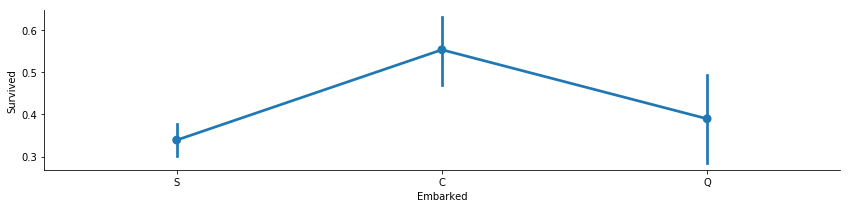

In [14]:
sns.factorplot("Embarked","Survived", data = train_df, size = 3 , aspect = 4)

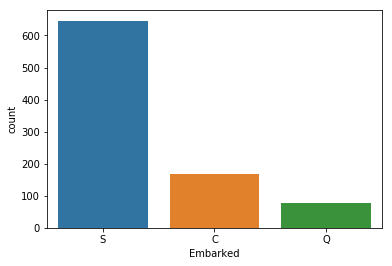

In [15]:
sns.countplot("Embarked", data = train_df)

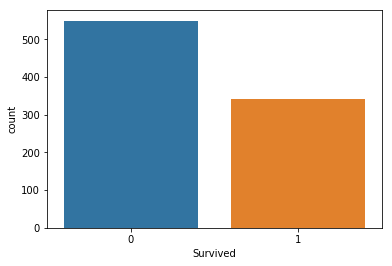

In [16]:
sns.countplot("Survived", data = train_df)

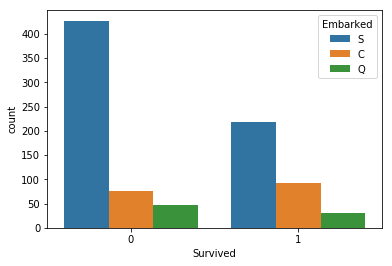

In [17]:
sns.countplot(x = "Survived", hue = "Embarked", data = train_df)

In [18]:
#Create dummy values for embarked 
embarked_dummy_train = pd.get_dummies(train_df["Embarked"])
embarked_dummy_train.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [19]:
#drop S embarked as it has low rate of survival
embarked_dummy_train.drop("S", axis = 1 , inplace= True)
embarked_dummy_train.head()

,C,Q
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [20]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [21]:
train_df = train_df.join(embarked_dummy_train)

In [22]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,C,Q
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,0


In [23]:
train_df.drop("Embarked", axis= 1 , inplace= True)

In [24]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q
0,0,3,male,22.0,1,0,7.2500,NaN,0,0
1,1,1,female,38.0,1,0,71.2833,C85,1,0
2,1,3,female,26.0,0,0,7.9250,NaN,0,0
3,1,1,female,35.0,1,0,53.1000,C123,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,0,0


In [25]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [26]:
embarked_dummy_test = pd.get_dummies(test_df["Embarked"])

In [27]:
embarked_dummy_test.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [28]:
embarked_dummy_test.drop("S", axis = 1 , inplace= True)

In [29]:
embarked_dummy_test.head()

,C,Q
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0


In [30]:
test_df = test_df.join(embarked_dummy_test)

In [31]:
test_df.drop("Embarked", axis=1, inplace= True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q
0,892,3,male,34.5,0,0,7.8292,NaN,0,1
1,893,3,female,47.0,1,0,7.0000,NaN,0,0
2,894,2,male,62.0,0,0,9.6875,NaN,0,1
3,895,3,male,27.0,0,0,8.6625,NaN,0,0
4,896,3,female,22.0,1,1,12.2875,NaN,0,0


In [32]:
train_df.info()
print("........")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
C           891 non-null uint8
Q           891 non-null uint8
dtypes: float64(2), int64(4), object(2), uint8(2)
memory usage: 57.5+ KB
........
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
C              418 non-null uint8
Q              418 non-null uint8
dtypes: float64(2), int64(4), object(2), uint8(

In [33]:
#Fill Fare missing Values in test set by median
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Cabin          91 non-null object
C              418 non-null uint8
Q              418 non-null uint8
dtypes: float64(2), int64(4), object(2), uint8(2)
memory usage: 27.0+ KB


In [35]:
#Change the type float to int
train_df["Fare"] = train_df["Fare"].astype(int)
test_df["Fare"] = test_df["Fare"].astype(int)

In [36]:
train_df.info()
print("........")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
Cabin       204 non-null object
C           891 non-null uint8
Q           891 non-null uint8
dtypes: float64(1), int64(5), object(2), uint8(2)
memory usage: 57.5+ KB
........
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
Cabin          91 non-null object
C              418 non-null uint8
Q              418 non-null uint8
dtypes: float64(1), int64(5), object(2), uint8(2)
m

In [37]:
fare_survived = train_df["Fare"][train_df["Survived"] == 1]
fare_not_survived = train_df["Fare"][train_df["Survived"] == 0]

In [38]:
Average = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
Average

,0
0,21.690346
1,47.991228


In [39]:
Stdev = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
Stdev

,0
0,31.392191
1,66.608344


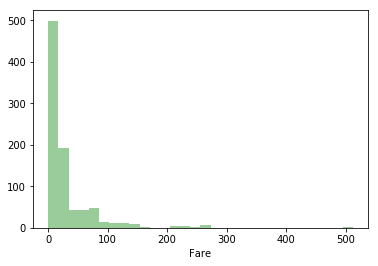

In [40]:
sns.distplot(train_df["Fare"], kde= False, bins = 30 , hist = True , color = "green")

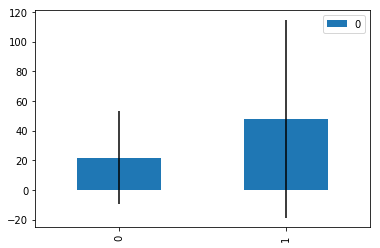

In [41]:
Average.plot(kind = "bar" , yerr = Stdev)

In [42]:
train_df.info()
print("........")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
Cabin       204 non-null object
C           891 non-null uint8
Q           891 non-null uint8
dtypes: float64(1), int64(5), object(2), uint8(2)
memory usage: 57.5+ KB
........
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
Cabin          91 non-null object
C              418 non-null uint8
Q              418 non-null uint8
dtypes: float64(1), int64(5), object(2), uint8(2)
m

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


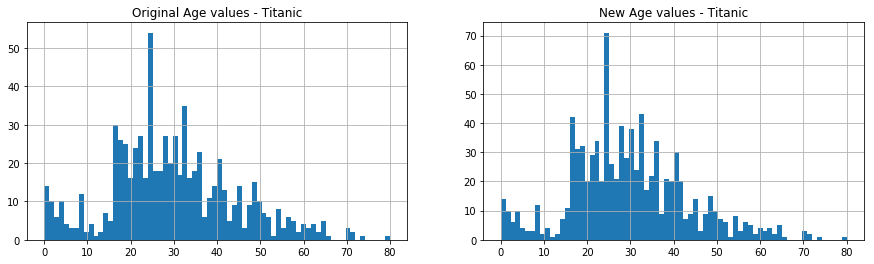

In [43]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')
train_df['Age'].dropna().astype(int).hist(bins=70, ax = axis1)
#Age data is also missing and it is in float 
average_age_train = train_df["Age"].mean()
std_age_train = train_df["Age"].std()
count_age_train_null = train_df["Age"].isnull().count()
average_age_test = test_df["Age"].mean()
std_age_test = test_df["Age"].std()
count_age_test_null = test_df["Age"].isnull().count()
#If you want to fill lots of missing values for age then create random values 
rand_train = np.random.randint(average_age_train - std_age_train , average_age_train + std_age_train , size = count_age_train_null)
rand_test = np.random.randint(average_age_test - std_age_test , average_age_test + std_age_test , size = count_age_test_null)
#fill values now 
train_df["Age"][np.isnan(train_df["Age"])] = rand_train
test_df["Age"][np.isnan(test_df["Age"])] = rand_test
#convert the type
train_df["Age"]=train_df["Age"].astype(int)
test_df["Age"]=test_df["Age"].astype(int)
train_df['Age'].hist(bins=70, ax = axis2)

In [44]:
target_1 = train_df["Age"][train_df["Survived"]== 0]
target_2 = train_df["Age"][train_df["Survived"]== 1]

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


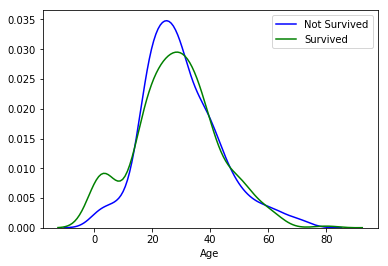

In [45]:
sns.distplot(target_1, hist = False, color = "Blue" , label = "Not Survived")
sns.distplot(target_2, hist = False, color = "green", label= "Survived")

In [46]:
train_df.info()
print("........")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
Cabin       204 non-null object
C           891 non-null uint8
Q           891 non-null uint8
dtypes: int64(6), object(2), uint8(2)
memory usage: 57.5+ KB
........
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
Cabin          91 non-null object
C              418 non-null uint8
Q              418 non-null uint8
dtypes: int64(6), object(2), uint8(2)
memory usage: 27.0+ KB


In [47]:
#Cabin Values are missing. Explore the cabin values. Only 2ö4 values are present out of 891 train samples. Hence drop it 
train_df["Cabin"].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [48]:
train_df.drop("Cabin", axis = 1 , inplace = True)
test_df.drop("Cabin", axis = 1 , inplace = True)


In [49]:
train_df.info()
print("......................")
test_df.info()
#no missing values are remaining now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
C           891 non-null uint8
Q           891 non-null uint8
dtypes: int64(6), object(1), uint8(2)
memory usage: 50.5+ KB
......................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
C              418 non-null uint8
Q              418 non-null uint8
dtypes: int64(6), object(1), uint8(2)
memory usage: 23.8+ KB


In [50]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,0,3,male,22,1,0,7,0,0
1,1,1,female,38,1,0,71,1,0
2,1,3,female,26,0,0,7,0,0
3,1,1,female,35,1,0,53,0,0
4,0,3,male,35,0,0,8,0,0
5,0,3,male,25,0,0,8,0,1
6,0,1,male,54,0,0,51,0,0
7,0,3,male,2,3,1,21,0,0
8,1,3,female,27,0,2,11,0,0
9,1,2,female,14,1,0,30,1,0


In [51]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q'], dtype='object')

In [52]:
#Family data cleaning 
train_df["Family"] = train_df["SibSp"] + train_df["Parch"]
test_df["Family"] = test_df["SibSp"] + test_df["Parch"]

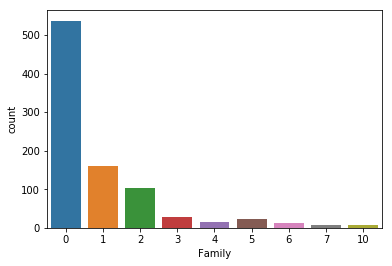

In [53]:
sns.countplot(train_df["Family"])

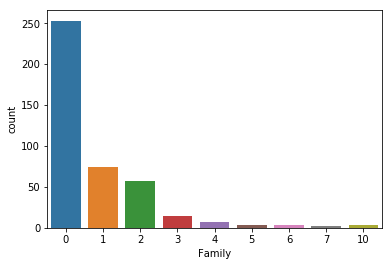

In [54]:
sns.countplot(test_df["Family"])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


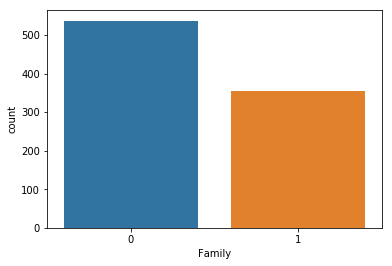

In [55]:
train_df["Family"][train_df["Family"]>0]= 1
train_df["Family"][train_df["Family"]==0]= 0
sns.countplot(train_df["Family"])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


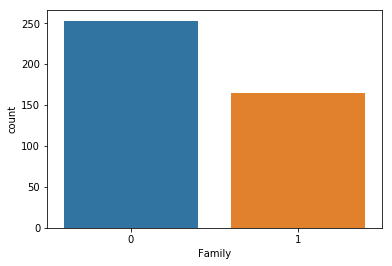

In [56]:
test_df["Family"][test_df["Family"]>0]= 1
test_df["Family"][test_df["Family"]==0]= 0
sns.countplot(test_df["Family"])


In [57]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,Family
0,0,3,male,22,1,0,7,0,0,1
1,1,1,female,38,1,0,71,1,0,1
2,1,3,female,26,0,0,7,0,0,0
3,1,1,female,35,1,0,53,0,0,1
4,0,3,male,35,0,0,8,0,0,0


In [58]:
#drop SibSp and Parch
train_df.drop(["SibSp","Parch"], axis = 1 , inplace= True)
test_df.drop(["SibSp","Parch"], axis = 1 , inplace= True)

In [59]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,C,Q,Family
0,0,3,male,22,7,0,0,1
1,1,1,female,38,71,1,0,1
2,1,3,female,26,7,0,0,0
3,1,1,female,35,53,0,0,1
4,0,3,male,35,8,0,0,0


In [60]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,C,Q,Family
0,892,3,male,34,7,0,1,0
1,893,3,female,47,7,0,0,1
2,894,2,male,62,9,0,1,0
3,895,3,male,27,8,0,0,0
4,896,3,female,22,12,0,0,1


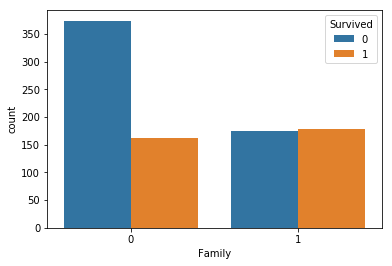

In [61]:
sns.countplot(train_df["Family"], hue= train_df["Survived"])

In [62]:
train_df["People"]  =train_df[['Age',"Sex"]].apply(lambda x: x["Sex"] if x["Age"] >= 16 else "Child" , axis = 1) 

In [63]:
train_df["People"].value_counts()

male      534
female    268
Child      89
Name: People, dtype: int64

In [64]:
test_df["People"]  =test_df[['Age',"Sex"]].apply(lambda x: x["Sex"] if x["Age"] >= 16 else "Child" , axis = 1) 

In [65]:
test_df["People"].value_counts()

male      247
female    139
Child      32
Name: People, dtype: int64

In [66]:
train_df[train_df["People"]== "male"][train_df["Survived"]== 1].count()/(train_df[train_df["People"]== "male"].count())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Survived    0.164794
Pclass      0.164794
Sex         0.164794
Age         0.164794
Fare        0.164794
C           0.164794
Q           0.164794
Family      0.164794
People      0.164794
dtype: float64

In [67]:

for cat in ("male", "female","Child"):
    x = (train_df[train_df["People"]== cat][train_df["Survived"]== 1].count())/(train_df[train_df["People"]== cat].count())
    print ( cat + str(x) )

maleSurvived    0.164794
Pclass      0.164794
Sex         0.164794
Age         0.164794
Fare        0.164794
C           0.164794
Q           0.164794
Family      0.164794
People      0.164794
dtype: float64
femaleSurvived    0.757463
Pclass      0.757463
Sex         0.757463
Age         0.757463
Fare        0.757463
C           0.757463
Q           0.757463
Family      0.757463
People      0.757463
dtype: float64
ChildSurvived    0.573034
Pclass      0.573034
Sex         0.573034
Age         0.573034
Fare        0.573034
C           0.573034
Q           0.573034
Family      0.573034
People      0.573034
dtype: float64


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,C,Q,Family,People
0,0,3,male,22,7,0,0,1,male
1,1,1,female,38,71,1,0,1,female
2,1,3,female,26,7,0,0,0,female
3,1,1,female,35,53,0,0,1,female
4,0,3,male,35,8,0,0,0,male


In [69]:
train_df.drop("Sex", axis = 1 , inplace= True)

In [70]:
train_df.head()

,Survived,Pclass,Age,Fare,C,Q,Family,People
0,0,3,22,7,0,0,1,male
1,1,1,38,71,1,0,1,female
2,1,3,26,7,0,0,0,female
3,1,1,35,53,0,0,1,female
4,0,3,35,8,0,0,0,male


In [71]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,C,Q,Family,People
0,892,3,male,34,7,0,1,0,male
1,893,3,female,47,7,0,0,1,female
2,894,2,male,62,9,0,1,0,male
3,895,3,male,27,8,0,0,0,male
4,896,3,female,22,12,0,0,1,female


In [72]:
test_df.drop("Sex", axis = 1 , inplace = True)

In [73]:
test_df.head()

,PassengerId,Pclass,Age,Fare,C,Q,Family,People
0,892,3,34,7,0,1,0,male
1,893,3,47,7,0,0,1,female
2,894,2,62,9,0,1,0,male
3,895,3,27,8,0,0,0,male
4,896,3,22,12,0,0,1,female


In [74]:
#get dummy values
people_dummy_train = pd.get_dummies(train_df["People"])
people_dummy_train.head()

,Child,female,male
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [75]:
people_dummy_train.drop("male",axis = 1 , inplace= True)
people_dummy_train.head()

,Child,female
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0


In [76]:
people_dummy_test = pd.get_dummies(test_df["People"])

In [77]:
people_dummy_test.head()

,Child,female,male
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [78]:
people_dummy_test.drop("male", axis = 1 , inplace= True)

In [79]:
people_dummy_test.head()

,Child,female
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [80]:
#join dummy dataframes with original tables
train_df = train_df.join(people_dummy_train)
test_df = test_df.join(people_dummy_test)

In [81]:
train_df.head()

,Survived,Pclass,Age,Fare,C,Q,Family,People,Child,female
0,0,3,22,7,0,0,1,male,0,0
1,1,1,38,71,1,0,1,female,0,1
2,1,3,26,7,0,0,0,female,0,1
3,1,1,35,53,0,0,1,female,0,1
4,0,3,35,8,0,0,0,male,0,0


In [82]:
test_df.head()

,PassengerId,Pclass,Age,Fare,C,Q,Family,People,Child,female
0,892,3,34,7,0,1,0,male,0,0
1,893,3,47,7,0,0,1,female,0,1
2,894,2,62,9,0,1,0,male,0,0
3,895,3,27,8,0,0,0,male,0,0
4,896,3,22,12,0,0,1,female,0,1


In [83]:
train_df.drop("People", axis = 1 , inplace= True)

In [84]:
test_df.drop("People", axis = 1 , inplace = True)

In [85]:
train_df.head()

,Survived,Pclass,Age,Fare,C,Q,Family,Child,female
0,0,3,22,7,0,0,1,0,0
1,1,1,38,71,1,0,1,0,1
2,1,3,26,7,0,0,0,0,1
3,1,1,35,53,0,0,1,0,1
4,0,3,35,8,0,0,0,0,0


In [86]:
test_df.head()

,PassengerId,Pclass,Age,Fare,C,Q,Family,Child,female
0,892,3,34,7,0,1,0,0,0
1,893,3,47,7,0,0,1,0,1
2,894,2,62,9,0,1,0,0,0
3,895,3,27,8,0,0,0,0,0
4,896,3,22,12,0,0,1,0,1


In [87]:

train_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

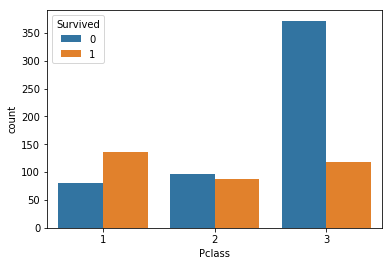

In [88]:
sns.countplot(train_df["Pclass"], hue = train_df["Survived"])

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


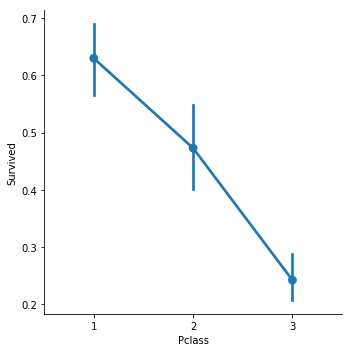

In [89]:
sns.factorplot("Pclass", "Survived", data= train_df)

In [90]:
train_df.head()

,Survived,Pclass,Age,Fare,C,Q,Family,Child,female
0,0,3,22,7,0,0,1,0,0
1,1,1,38,71,1,0,1,0,1
2,1,3,26,7,0,0,0,0,1
3,1,1,35,53,0,0,1,0,1
4,0,3,35,8,0,0,0,0,0


In [91]:
class_dummy_train = pd.get_dummies(train_df["Pclass"])
class_dummy_train.columns = ["Class1", "Class2", "Class3"]

In [92]:
class_dummy_train.head()

,Class1,Class2,Class3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [93]:
class_dummy_train.drop("Class3", axis= 1 , inplace= True ) 

In [94]:
class_dummy_train.head()

,Class1,Class2
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [95]:
train_df=train_df.join(class_dummy_train)

In [96]:
train_df.head()

,Survived,Pclass,Age,Fare,C,Q,Family,Child,female,Class1,Class2
0,0,3,22,7,0,0,1,0,0,0,0
1,1,1,38,71,1,0,1,0,1,1,0
2,1,3,26,7,0,0,0,0,1,0,0
3,1,1,35,53,0,0,1,0,1,1,0
4,0,3,35,8,0,0,0,0,0,0,0


In [97]:
train_df.drop("Pclass", axis = 1 , inplace = True)

In [98]:
train_df.head()

,Survived,Age,Fare,C,Q,Family,Child,female,Class1,Class2
0,0,22,7,0,0,1,0,0,0,0
1,1,38,71,1,0,1,0,1,1,0
2,1,26,7,0,0,0,0,1,0,0
3,1,35,53,0,0,1,0,1,1,0
4,0,35,8,0,0,0,0,0,0,0


In [99]:
test_df.head()

,PassengerId,Pclass,Age,Fare,C,Q,Family,Child,female
0,892,3,34,7,0,1,0,0,0
1,893,3,47,7,0,0,1,0,1
2,894,2,62,9,0,1,0,0,0
3,895,3,27,8,0,0,0,0,0
4,896,3,22,12,0,0,1,0,1


In [100]:
Class_dummy_test = pd.get_dummies(test_df["Pclass"])
Class_dummy_test.columns = ["Class1","Class2","Class3"]

In [101]:
Class_dummy_test.head()

,Class1,Class2,Class3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [102]:
Class_dummy_test.drop("Class3", axis= 1 , inplace= True)

In [103]:
Class_dummy_test.head()

,Class1,Class2
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [104]:
test_df = test_df.join(Class_dummy_test)

In [105]:
test_df.head()

,PassengerId,Pclass,Age,Fare,C,Q,Family,Child,female,Class1,Class2
0,892,3,34,7,0,1,0,0,0,0,0
1,893,3,47,7,0,0,1,0,1,0,0
2,894,2,62,9,0,1,0,0,0,0,1
3,895,3,27,8,0,0,0,0,0,0,0
4,896,3,22,12,0,0,1,0,1,0,0


In [106]:
test_df.drop("Pclass", axis = 1 , inplace= True)

In [107]:
test_df.head()

,PassengerId,Age,Fare,C,Q,Family,Child,female,Class1,Class2
0,892,34,7,0,1,0,0,0,0,0
1,893,47,7,0,0,1,0,1,0,0
2,894,62,9,0,1,0,0,0,0,1
3,895,27,8,0,0,0,0,0,0,0
4,896,22,12,0,0,1,0,1,0,0


In [108]:
#define training and testing data 
X_train = train_df.drop("Survived", axis = 1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis = 1 ).copy()

In [109]:
X_train.head()

,Age,Fare,C,Q,Family,Child,female,Class1,Class2
0,22,7,0,0,1,0,0,0,0
1,38,71,1,0,1,0,1,1,0
2,26,7,0,0,0,0,1,0,0
3,35,53,0,0,1,0,1,1,0
4,35,8,0,0,0,0,0,0,0


In [110]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [111]:
X_test.head()

,Age,Fare,C,Q,Family,Child,female,Class1,Class2
0,34,7,0,1,0,0,0,0,0
1,47,7,0,0,1,0,1,0,0
2,62,9,0,1,0,0,0,0,1
3,27,8,0,0,0,0,0,0,0
4,22,12,0,0,1,0,1,0,0


In [112]:
#Apply models now 
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [113]:
logistic = LogisticRegression()
logistic.fit(X_train,Y_train)
prediction = logistic.predict(X_test)
logistic.score(X_train,Y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8092031425364759

In [114]:
from sklearn.svm import SVC
svc = SVC()

In [115]:
svc.fit(X_train,Y_train)
predict = svc.predict(X_test)
svc.score(X_train,Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8585858585858586

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
random = RandomForestClassifier()

In [118]:
random.fit(X_train,Y_train)
predict = random.predict(X_test)
random.score(X_train,Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9562289562289562

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
knn = KNeighborsClassifier()

In [121]:
knn.fit(X_train,Y_train)
predict = knn.predict(X_test)
knn.score(X_train,Y_train)

0.7867564534231201